In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取时延

In [1333]:
import os
file_names = []
for file_name in os.listdir('./eclogs/data/opt-6files'):
    if 'read' in file_name:
        file_names.append(file_name)
file_names

['readLatency2020-04-0920_36_55_size_25.txt',
 'readLatency2020-04-0920_37_56_size_50.txt',
 'readLatency2020-04-0920_38_58_size_75.txt',
 'readLatency2020-04-0920_40_20_size_100.txt',
 'readLatency2020-04-0920_41_22_size_125.txt',
 'readLatency2020-04-0920_42_48_size_150.txt',
 'readLatency2020-04-0920_44_03_size_175.txt',
 'readLatency2020-04-0920_45_28_size_200.txt',
 'readLatency2020-04-0920_47_02_size_225.txt',
 'readLatency2020-04-0920_48_50_size_250.txt',
 'readLatency2020-04-0922_33_23_size_125.txt',
 'readLatency2020-04-0922_46_41_size_125.txt']

In [1335]:
read_latency_row = pd.read_csv('eclogs/data/opt-6files/' + file_names[11], names = ['file', 'block', 'ms'], sep=' ')
for index in read_latency_row.index:
    if read_latency_row['ms'][index] > 1000:
        read_latency_row = read_latency_row.drop(index)
read_latency_row = read_latency_row.reset_index(drop=True)

In [1328]:
read_latency_blk = read_latency_row.groupby(['file', 'block']).mean().unstack()
read_latency_row

,file,block,ms
0,0,1,285
1,0,0,289
2,0,2,415
3,0,1,99
4,0,0,104
...,...,...,...
715,5,2,184
716,5,1,186
717,5,0,34
718,5,1,187


In [1329]:
# read_latency_node_mean = read_latency_row.drop(columns=['block']).groupby(['file', 'node']).mean().unstack()
# read_latency_node_mean

In [1330]:
block_location = pd.read_csv('eclogs/workersToWrite.txt',names = range(read_latency_blk.shape[-1]), sep = ' ')
read_latency_row['node'] = [block_location.at[read_latency_row.at[i, 'file'], read_latency_row.at[i, 'block']] for i in range(read_latency_row.shape[0])]
# read_latency_node = read_latency_row.drop('block', axis = 1).groupby(['file', 'node']).mean().unstack()
read_latency_node = pd.DataFrame(dict(list(read_latency_row.groupby('node')['ms'])))

read_latency_node_dic = dict()
for column in read_latency_node.columns:
    read_latency_node_dic[column] = read_latency_node[column].dropna().values

maxlen = 0
for key in read_latency_node_dic.keys():
    if key == 0:
        continue
    if len(read_latency_node_dic[key]) > maxlen:
        maxlen = len(read_latency_node_dic[key])

for key in read_latency_node_dic.keys():
    idx_to_drop = []
    if key == 0:
        continue
    for i in range(len(read_latency_node_dic[key])):
        if read_latency_node_dic[key][i] >= 1000:
            idx_to_drop.append(i)
    read_latency_node_dic[key] = np.delete(read_latency_node_dic[key], idx_to_drop)
# read_latency_node
for key in read_latency_node_dic.keys():
    line = ''
    if key == 0:
        continue
    for i in range(maxlen):
        line += str(read_latency_node_dic[key][i%len(read_latency_node_dic[key])]) + ' '
    print(line + ';')
# read_latency_node_dic

206.0 271.0 183.0 265.0 185.0 185.0 180.0 188.0 183.0 183.0 321.0 318.0 185.0 188.0 194.0 282.0 250.0 182.0 179.0 185.0 197.0 185.0 206.0 390.0 196.0 272.0 261.0 184.0 187.0 430.0 286.0 369.0 400.0 591.0 243.0 239.0 184.0 483.0 598.0 594.0 612.0 634.0 697.0 762.0 654.0 422.0 423.0 411.0 187.0 221.0 222.0 515.0 413.0 376.0 276.0 282.0 428.0 334.0 348.0 331.0 371.0 681.0 590.0 239.0 242.0 190.0 192.0 183.0 184.0 185.0 396.0 399.0 354.0 337.0 341.0 271.0 266.0 182.0 317.0 369.0 271.0 558.0 516.0 525.0 323.0 181.0 354.0 365.0 506.0 322.0 330.0 366.0 370.0 368.0 197.0 264.0 353.0 422.0 357.0 245.0 187.0 182.0 181.0 186.0 183.0 183.0 185.0 244.0 214.0 268.0 269.0 186.0 181.0 185.0 183.0 187.0 186.0 187.0 206.0 271.0 183.0 265.0 185.0 185.0 180.0 188.0 183.0 183.0 321.0 318.0 185.0 188.0 194.0 282.0 250.0 182.0 179.0 185.0 197.0 185.0 206.0 390.0 196.0 272.0 261.0 184.0 187.0 430.0 286.0 369.0 400.0 591.0 243.0 239.0 184.0 483.0 598.0 594.0 612.0 634.0 697.0 762.0 654.0 422.0 423.0 411.0 187.

## 记录不同策略及文件大小下的平均块传输时延

In [1331]:
# mean_time = read_latency_node.mean().mean()
mean_time = read_latency_row['ms'].mean()
with open('eclogs/MeanLatencyOfNodes.txt', 'a') as f:
    f.write(str(mean_time) + ' ')
mean_time

239.23333333333332

Text(0.5, 1.0, 'mean block fetching latency')

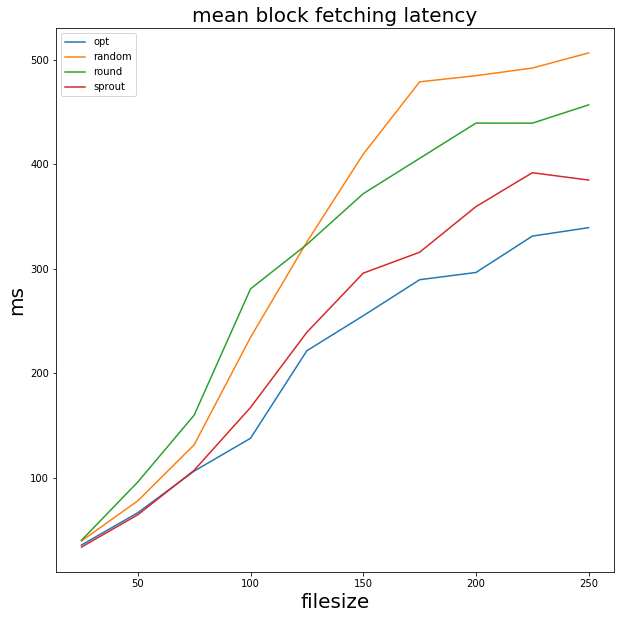

In [1349]:
meantime_filesize = pd.read_csv('eclogs/MeanLatencyOfNodes.txt',header = None, sep = ' ').dropna(1)
filesize = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250]
meantime_filesize.loc[0]
fig, ax = plt.subplots(1, figsize = (10, 10))
ax.plot(filesize, meantime_filesize.loc[0])
ax.plot(filesize, meantime_filesize.loc[1])
ax.plot(filesize, meantime_filesize.loc[2])
ax.plot(filesize, meantime_filesize.loc[3])
ax.set_xlabel('filesize', size = 20)
ax.set_ylabel('ms', size = 20)
ax.legend(['opt', 'random', 'round', 'sprout'])
ax.set_title('mean block fetching latency', size = 20)

[Text(0, 0, 'node0'),
 Text(0, 0, 'node1'),
 Text(0, 0, 'node2'),
 Text(0, 0, 'node3'),
 Text(0, 0, 'node4')]

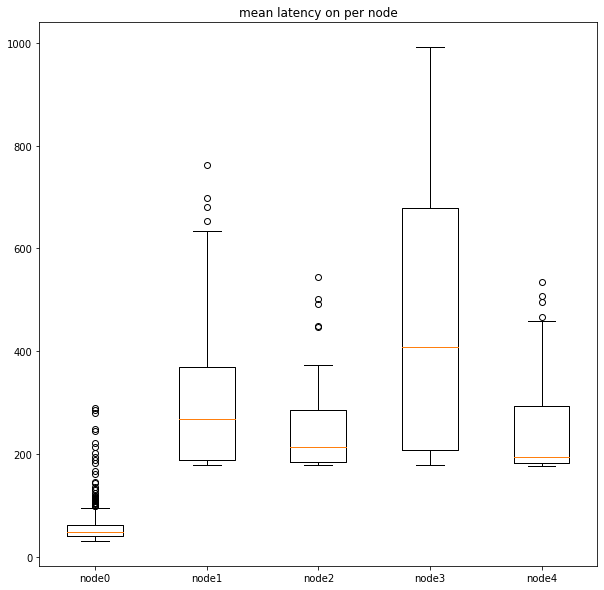

In [1339]:
fig, ax = plt.subplots(1, figsize = (10, 10))
ax.boxplot(read_latency_node_dic.values())
ax.set_title('mean latency on per node')
ax.set_xticklabels(["node0", "node1", "node2", "node3", "node4",])

# 节点服务能力统计

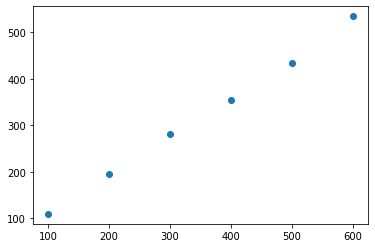

In [144]:
size = [100, 200, 300, 400, 500, 600]
time = [[]]*4
time[0] = [105, 198, 282, 372, 464, 543]
time[1] = [112, 193, 279, 361, 474, 543]
time[2] = [68, 117, 173, 221, 271, 324]
time[3] = [109, 195, 281, 354, 434, 535]
plt.scatter(size, time[3])

In [145]:
[[]]*2

[[], []]

# 解码时延

In [158]:
decode_latency_row = pd.read_csv('eclogs/decodingLatency.txt', names = ['num', 'ms'], sep = ' ')

## 按块数分组

In [159]:
def yforx(x, y):
    dic = dict.fromkeys(set(x))
    length = list()
    for key in dic.keys():
        dic[key] = list()
    for idx in range(len(x)):
        dic[x[idx]].append(y[idx])
    for key in dic.keys():
        length.append(len(dic[key]))
    for key in dic.keys():
        dic[key].extend([None] * (max(length) - len(dic[key])))
    return dic

In [160]:
decode_latency = pd.DataFrame(yforx(decode_latency_row['num'], decode_latency_row['ms'])).astype('float64')
# print(decode_latency[1].dropna().values)
decode_latency_row

,num,ms
0,1,108
1,1,256
2,1,91
3,1,101
4,1,106
...,...,...
123,1,75
124,1,80
125,1,70
126,1,77


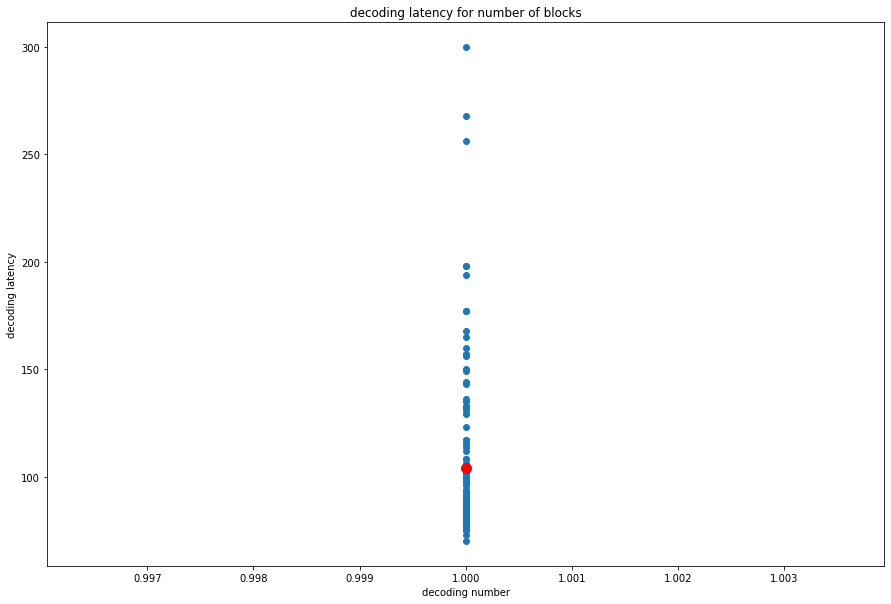

In [161]:
fig1, ax1 = plt.subplots(1, figsize = (15, 10))
ax1.scatter(decode_latency_row['num'], decode_latency_row['ms'])
ax1.set_title('decoding latency for number of blocks')
ax1.scatter(decode_latency_row['num'].unique(), decode_latency_row.groupby(['num']).mean(), color = 'r', s = 100)
plt.xlabel('decoding number')
plt.ylabel('decoding latency')
plt.savefig(fname = 'decoding latency.png', format = 'png')

KeyError: 200

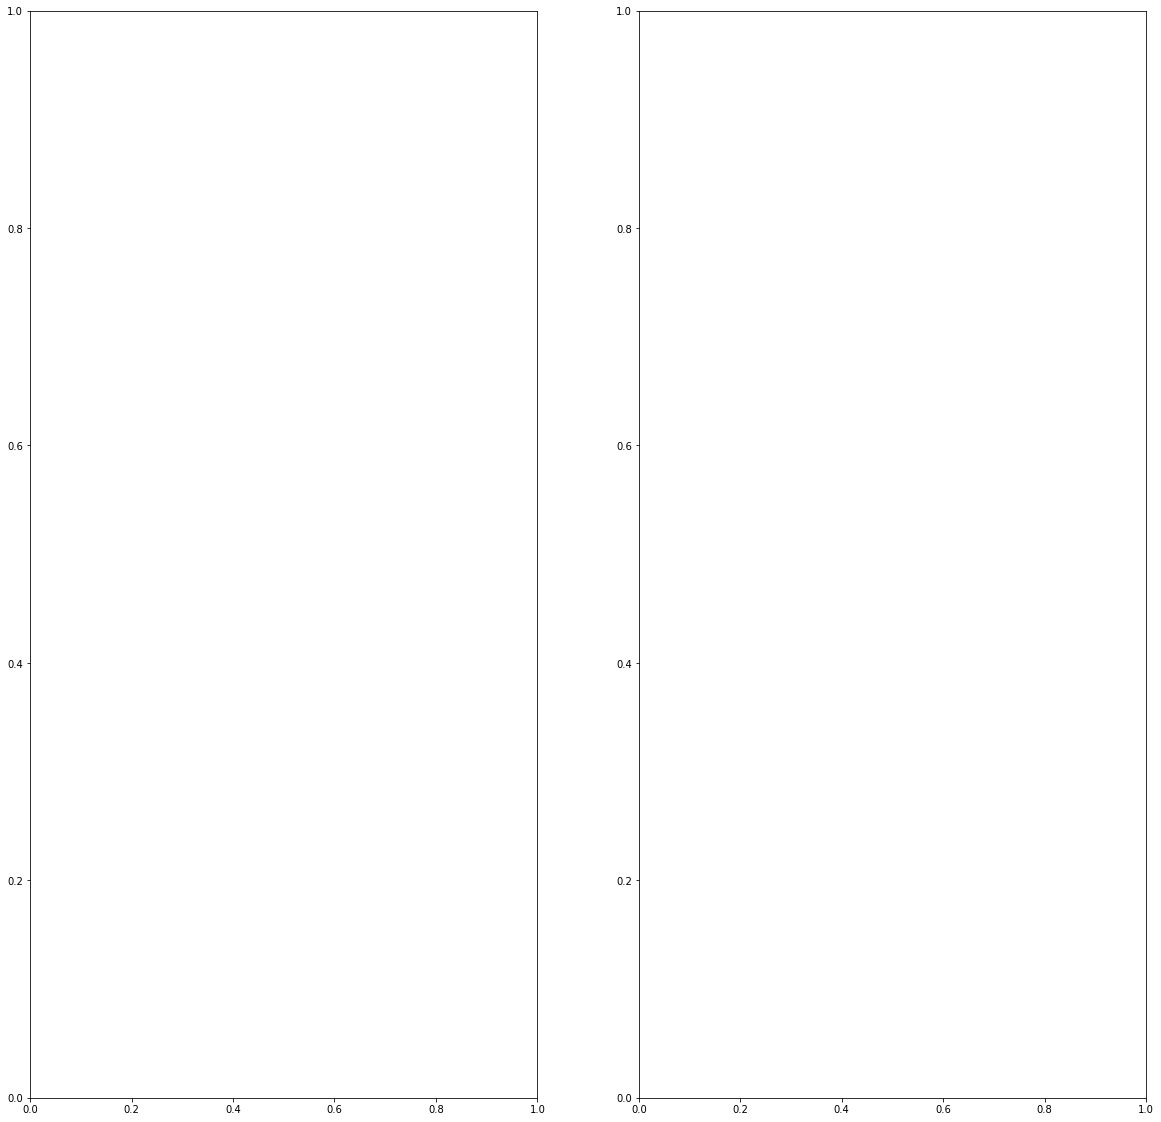

In [150]:
from scipy.stats import chi2, f
chi2y = chi2.pdf(np.arange(0.001,50, 0.1), 10, loc = 5.3, scale = 0.3) * 0.11
fy =f.pdf(np.arange(0.001,50, 0.1), 4, 2)

fig, axes = plt.subplots(nrows = decode_latency.shape[1],ncols = 2, figsize = (20, 20), sharex = True, sharey = False)

if(decode_latency.shape[1] == 1):
    axes[0].scatter(range(len(decode_latency[i + 1])), decode_latency[i + 1].sort_values())
    axes[0].set_title('decoding latency rank for '+str(i+1)+' blocks')
    axes[1].set_title('decoding latency distribution for '+str(i+1)+' blocks')
    axes[1].hist(decode_latency[i + 1].dropna().values, bins = 50, density = 1)
else:
    for i in range(len(axes)): 
        axes[i, 0].scatter(range(len(decode_latency[i + 1])), decode_latency[i + 1].sort_values())
        axes[i, 0].set_title('decoding latency rank for '+str(i+1)+' blocks')
        axes[i, 1].set_title('decoding latency distribution for '+str(i+1)+' blocks')
        axes[i, 1].hist(decode_latency[i + 1].dropna().values, bins = 50, density = 1)
plt.xlabel('decoding latency')
plt.ylabel('frequency')
#     axes[i, 1].plot(chi2y)
plt.savefig(fname="解码时延2.png",format="png")

# 从pi计算读取策略

In [1227]:
import pandas as pd
p = pd.read_csv('eclogs/p-sprout.txt',header = None, sep = '\s+')
# lmp = pd.read_csv('eclogs/lmp.txt',header = None, sep = '\s+')
p

,0,1,2,3
0,0.3567,0.0000,0.6433,0.0000
1,0.0000,0.0000,1.0000,0.0000
2,0.4305,1.0000,0.5695,1.0000
3,0.8995,0.1005,0.0000,0.0000
4,0.9906,0.0000,1.0000,0.0094
5,0.2823,1.0000,1.0000,0.7177


In [1228]:
k = 3
C = 7
N = 4
# p['cache'] = k - p.sum(axis = 1)
# data = []
# for i in range(len(lmp)):
#     data.extend(lmp.values[i])
def quick_sort(lists):
    if not lists:
        return []
    assert isinstance(lists, list)
    if len(lists) == 1:
        return lists
    pivot = lists.pop()
    llist, rlist = [], []
    for x in lists:
        if x>pivot:
            rlist.append(x)
        else:
            llist.append(x)
    return quick_sort(llist) + [pivot] + quick_sort(rlist)

def sort_topk(s, k):
    # return sorted(s)[:k]
    return quick_sort(s)[-k:]    

# def determine_palcement():
#     topk = sort_topk(data, C)
#     kth = topk[0]
#     for i in range(lmp.shape[1]):
#         for j in range(lmp.shape[0]):
#             if lmp[i][j] >= kth:
# #                 p[i][j] = 0
#                 continue
# #     placement = (0.1 - p) < 0
#     placement = (p > 0)
#     print(p)
#     return placement

In [1229]:
p

,0,1,2,3
0,0.3567,0.0000,0.6433,0.0000
1,0.0000,0.0000,1.0000,0.0000
2,0.4305,1.0000,0.5695,1.0000
3,0.8995,0.1005,0.0000,0.0000
4,0.9906,0.0000,1.0000,0.0094
5,0.2823,1.0000,1.0000,0.7177


In [1230]:
import math

workersToWrite = list()
# placement = determine_palcement()
for index in p.index:
#     vc = placement.loc[index].value_counts()
#     new_row = [0] * int(N - sum(np.ceil(p.loc[index] - 0.01)))
    new_row = [0] * int(N - sum(np.ceil(p.loc[index])))
    
    tmp = []
    cnt0 = (p.loc[index] == 0).astype(int).sum()
    kth = sort_topk(list(p.loc[index]), k - cnt0)[0]
    for i in range(p.shape[1]):
        if (p.loc[index][i] >= kth) & (p.loc[index][i] != 0):
            tmp.append(i+1)
    new_row.extend(tmp)
    
    tmp = []
    for i in range(p.shape[1]):
        if (p.loc[index][i] < kth) & (p.loc[index][i] != 0):
            tmp.append(i+1)
    new_row.extend(tmp)
    workersToWrite.append(new_row)
pd.DataFrame(workersToWrite).to_csv('eclogs/workersToWrite.txt', index=False, header=False, sep = ' ')
workersToWrite                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

[[0, 0, 3, 1],
 [0, 0, 0, 3],
 [2, 3, 4, 1],
 [0, 0, 1, 2],
 [0, 1, 3, 4],
 [2, 3, 4, 1]]

In [1232]:
circle_times = 40
read_list = list()

while(len(read_list) < circle_times*len(p)):
    rand = pd.DataFrame(np.random.rand(p.shape[0], p.shape[1]))
    read_matrix = (rand - p) < 0
    
    for index in read_matrix.index:
        new_row = []
        while(len(new_row) != k):
            rand = pd.DataFrame(np.random.rand(p.shape[0], p.shape[1]))
            read_matrix = (rand - p) < 0
            vc = read_matrix.loc[index].value_counts()
            new_row = list(np.arange(workersToWrite[index].count(0)))
            if(len(new_row) > k):
                new_row = new_row[:k]
                
            tmp = []
            for j in range(0, p.shape[1]):
                if (read_matrix.loc[index][j] == True) and (j+1 in workersToWrite[index]):
                    tmp.append(workersToWrite[index].index(j+1))
            new_row.extend(tmp)
            print(new_row)
        read_list.append(new_row)
pd.DataFrame(read_list).to_csv('eclogs/blocksToRead.txt', index=False, header=False, sep = ' ')

[0, 1, 3, 2]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0

KeyboardInterrupt: 

In [ ]:
np.arange(workersToWrite[3].count(0))
# np.random.randint(0, len(t))
import time
time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())